# Oscillateur amorti

Import des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact,interactive, fixed

## Fonction oscillateur
Définition de la fonction oscillateur. Deux paramètres sont importants: 
- om: pour $\omega_0$
- Q: facteur de qualité

In [2]:
def oscillateur(y,t, om, Q):
    return (y[1], -om**2*y[0] - om/Q*y[1])

## Paramètres de la simulation
On définit le temps et trois oscillateurs afin d'illustrer les différents régimes. Les conditions initiales sont $y=1$ et $\dot{y}=0$. $\omega_0$ est fixé à 1.

In [3]:
t = np.arange(0.,50,.1)
Ypp = odeint(oscillateur, (1, 0), t, args=(1, 3)) # omega = 1, Q=3
Yc = odeint(oscillateur, (1, 0), t, args=(1, 0.5)) # omega = 1, Q=0.5
Yap = odeint(oscillateur, (1, 0), t, args=(1, 0.1)) # omega = 1, Q=0.1

## Première figure: visualisation des différents régimes

<IPython.core.display.Javascript object>


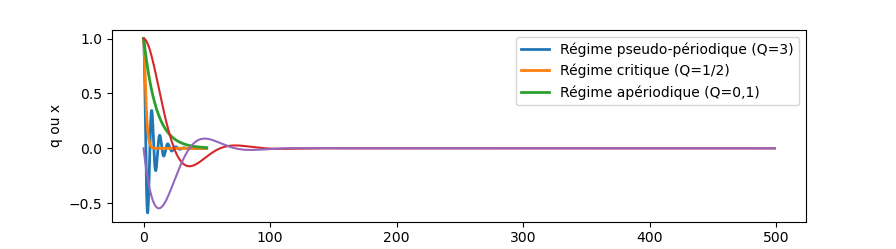

In [4]:
%matplotlib notebook
plt.figure(1)
plt.plot(t, Ypp[:,0], lw=2, label="Régime pseudo-périodique (Q=3)")
plt.plot(t, Yc[:,0], lw=2, label="Régime critique (Q=1/2)")
plt.plot(t, Yap[:,0], lw=2, label="Régime apériodique (Q=0,1)")
plt.xlabel("t")
plt.ylabel("q ou x")
plt.legend()
plt.show()

## Deuxième figure: modification de $Q$ et de $\omega_0$

In [22]:
def f(Q):
    Y=odeint(oscillateur, (1, 0), t, args=(1, Q))
    return Y[:,0]

In [23]:
w=interactive(f,Q=(0.0,5.0))

<IPython.core.display.Javascript object>


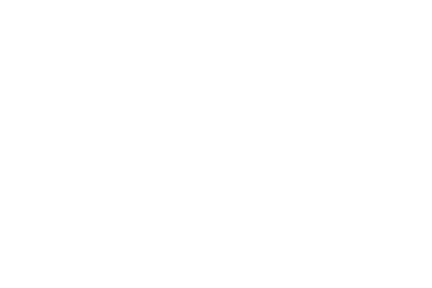

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

<IPython.core.display.Javascript object>


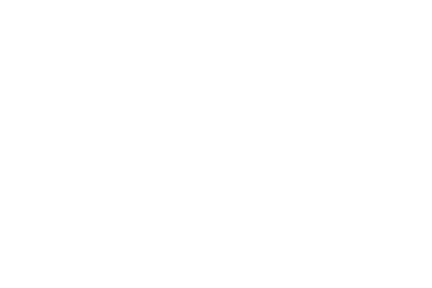

In [25]:
%matplotlib notebook
w
plt.figure(2)
plt.plot(t,w)